# Useful functions 

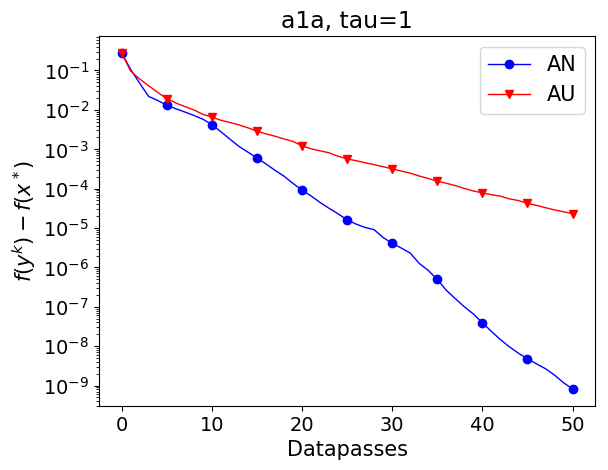

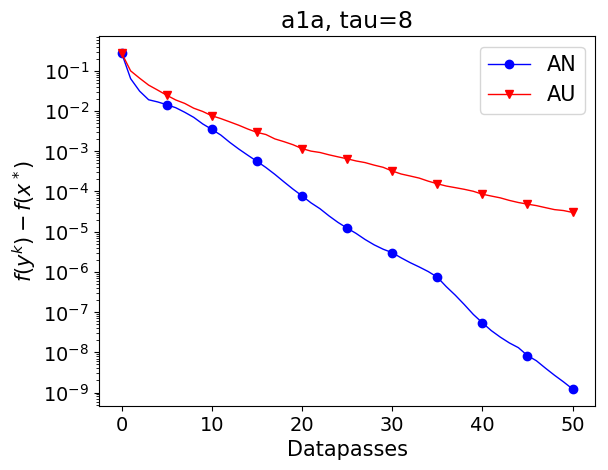

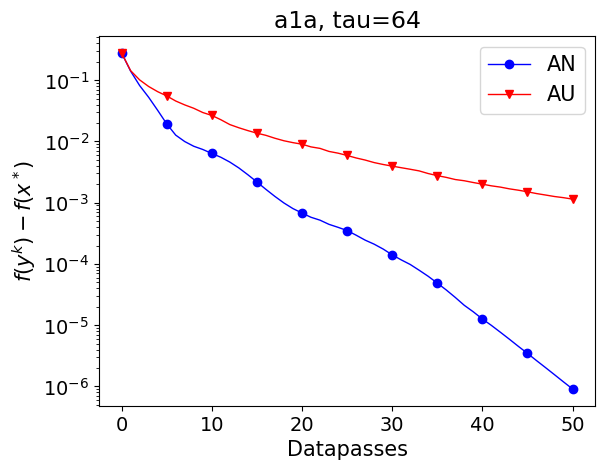

In [5]:
corrupt=false

cols=["blue","red","green","orange"]
marks=["o","v","+","*"]
labels=["AN","AU","NN","NU"]
datasets=["a1a"]#,"news20.scale"]
taus=[1,8,64]
for dataset in datasets
    for tau in taus
        counter=1
        figure()
        for acc in [true,false]
            for nonunif in [true]#,false]
                F=load(string("results/remote/new2/999NEWdataset",dataset,"tau",tau,"acc",acc,"corrupt",corrupt,".jld"),"F")
                markev = max(Int64(round(length(F)/10)),1)
                semilogy((0:(length(F)-1)),F,color=cols[counter],linewidth=1.0, marker=marks[counter],markevery=markev,label=labels[counter])
                 counter=counter+1
            end
        end
        
        legend(loc="best",fontsize=15)
        ylabel(L"f(y^k)-f(x^*)", fontsize=15)
        xlabel("Datapasses", fontsize=15)
        title(string(dataset,", tau=",tau), fontsize=17)
        ax=axes()
         ax[:tick_params]("both",labelsize=14) 
        #savefig(string("a"),bbox_inches="tight")
        savefig(string("images/NEW22_REMOTE_tau_", tau ,"_data_",dataset[1:3]),bbox_inches="tight")

    end
end
  

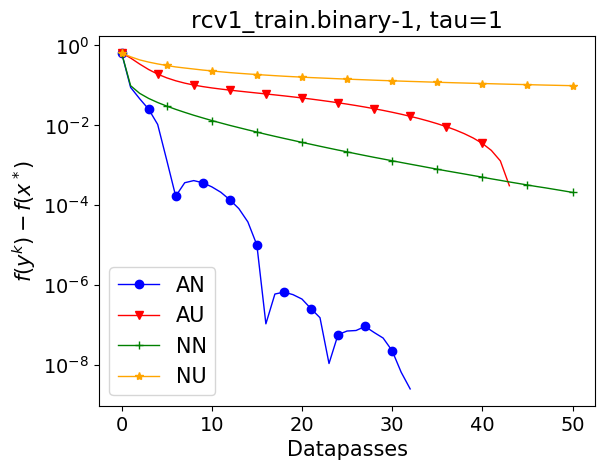

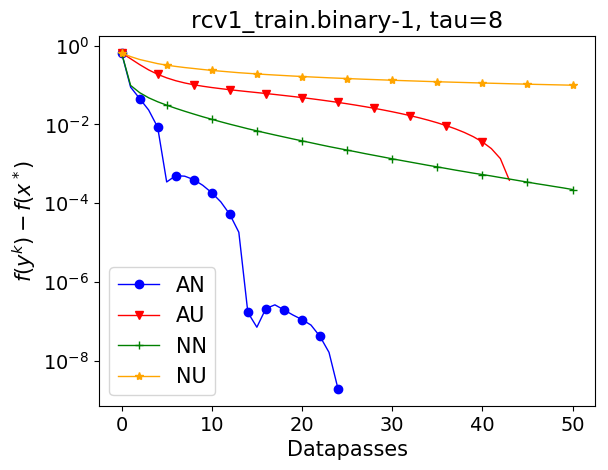

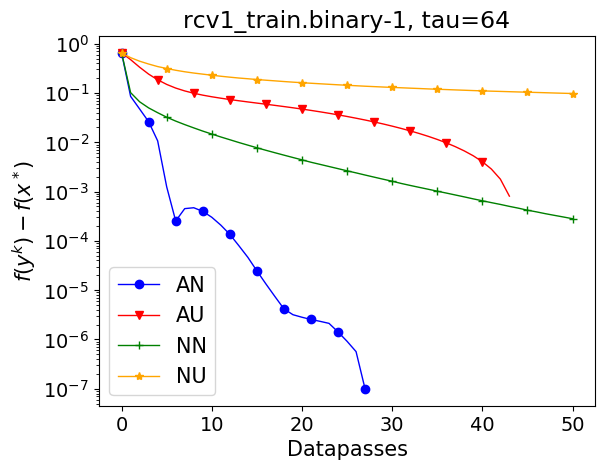

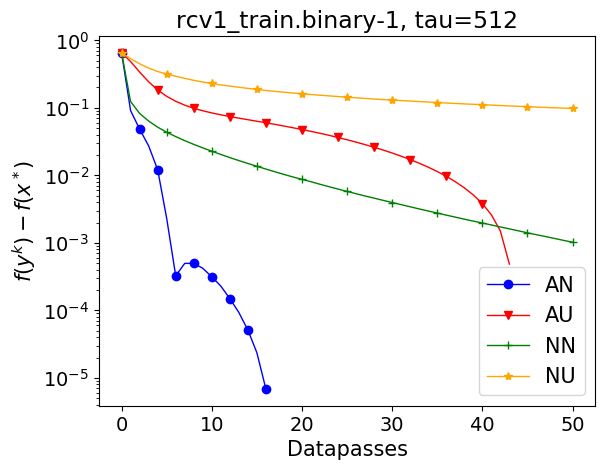

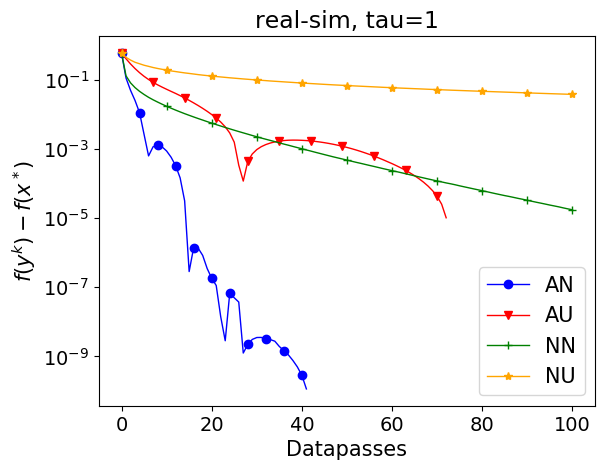

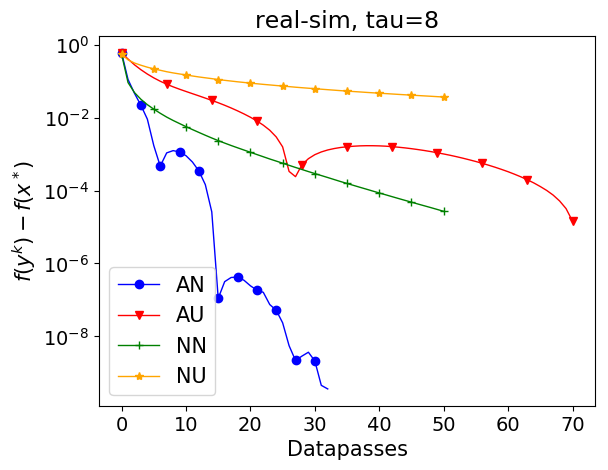

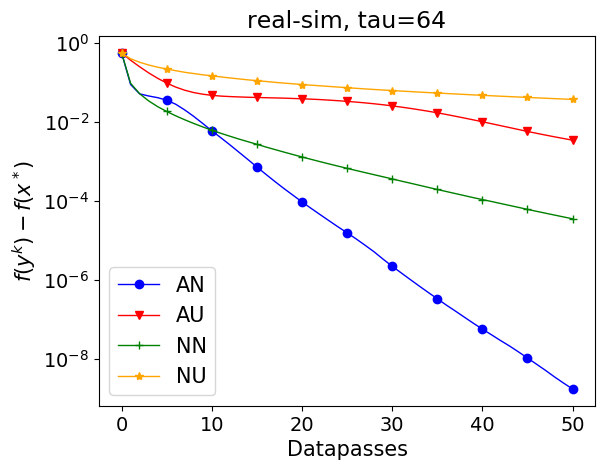

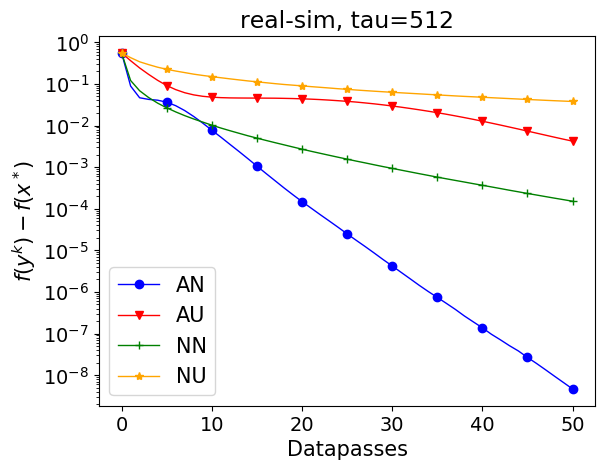

In [8]:
corrupt=false

cols=["blue","red","green","orange"]
marks=["o","v","+","*"]
labels=["AN","AU","NN","NU"]
datasets=["rcv1_train.binary-1","real-sim"]#,"news20.scale"]
taus=[1,8,64,512]
for dataset in datasets
    for tau in taus
        counter=1
        figure()
        for acc in [true,false]
            for nonunif in [true,false]
                F=load(string("results/remote/new2/NEWdataset",dataset,"tau",tau,"acc",acc,"nonunif",nonunif,"corrupt",corrupt,".jld"),"F")
                markev = max(Int64(round(length(F)/10)),1)
                semilogy((0:(length(F)-1)),F,color=cols[counter],linewidth=1.0, marker=marks[counter],markevery=markev,label=labels[counter])
                 counter=counter+1
            end
        end
        
        legend(loc="best",fontsize=15)
        ylabel(L"f(y^k)-f(x^*)", fontsize=15)
        xlabel("Datapasses", fontsize=15)
        title(string(dataset,", tau=",tau), fontsize=17)
        ax=axes()
         ax[:tick_params]("both",labelsize=14) 
        #savefig(string("a"),bbox_inches="tight")
        savefig(string("images/NEW22_REMOTE_tau_", tau ,"_data_",dataset[1:3]),bbox_inches="tight")

    end
end
  

In [ ]:


corrupt=false

cols=["blue","red","green","orange"]
marks=["o","v","+","*"]
labels=["AN","AU","NN","NU"]
datasets=["rcv1_train.binary-1","real-sim"]
taus=[1,8,64]#,512]
for dataset in datasets
    for tau in taus
        counter=1
        figure()
        for acc in [true,false]
            for nonunif in [true,false]
                F=load(string("results/remote/new/SVMdataset",dataset,"tau",tau,"acc",acc,"nonunif",nonunif,"corrupt",corrupt,".jld"),"F")
                markev = max(Int64(round(length(F)/10)),1)
                semilogy((0:(length(F)-1)),F,color=cols[counter],linewidth=1.0, marker=marks[counter],markevery=markev,label=labels[counter])
                 counter=counter+1
            end
        end
        
        legend(loc="lower left",fontsize=15)
        ylabel(L"f(y^k)-f(x^*)", fontsize=15)
        xlabel("Datapasses", fontsize=15)
        title(string(dataset,", tau=",tau), fontsize=17)

        #savefig(string("a"),bbox_inches="tight")
        savefig(string("images/SVM_REMOTE_tau_", tau ,"_data_",dataset[1:3]),bbox_inches="tight")

    end
end
  
                

In [ ]:
corrupt=false

cols=["blue","red","green","orange"]
marks=["o","v","+","*"]
labels=["AN","AU","NN","NU"]
datasets=["rcv1_train.binary-1","news20.scale"]
taus=[1,8,64,512]
for dataset in datasets
    for tau in taus
        counter=1
        figure()
        for acc in [true,false]
            for nonunif in [true,false]
                F=load(string("results/remote/NEWdataset",dataset,"tau",tau,"acc",acc,"nonunif",nonunif,"corrupt",corrupt,".jld"),"F")
                markev = max(Int64(round(length(F)/10)),1)
                semilogy((0:(length(F)-1)),F,color=cols[counter],linewidth=1.0, marker=marks[counter],markevery=markev,label=labels[counter])
                 counter=counter+1
            end
        end
        
        legend(loc="lower left",fontsize=10)
        ylabel(L"f(y^k)-f(x^*)", fontsize=15)
        xlabel("Datapasses", fontsize=15)
        title(string(dataset,", tau=",tau), fontsize=17)

        #savefig(string("a"),bbox_inches="tight")
        savefig(string("images/REMOTE_tau_", tau ,"_data_",dataset[1:3]),bbox_inches="tight")

    end
end
  
dataset="real-sim"
corrupt=true
for tau in taus
    counter=1
    figure()
    for acc in [true,false]
        for nonunif in [true,false]
            F=load(string("results/remote/2dataset",dataset,"tau",tau,"acc",acc,"nonunif",nonunif,"corrupt",corrupt,".jld"),"F")
            markev = max(Int64(round(length(F)/10)),1)
            semilogy((0:(length(F)-1)),F,color=cols[counter],linewidth=1.0, marker=marks[counter],markevery=markev,label=labels[counter])
             counter=counter+1
        end
    end

    legend(loc="lower left",fontsize=10)
    ylabel(L"f(y^k)-f(x^*)", fontsize=15)
    xlabel("Datapasses", fontsize=15)
    title(string(dataset,", tau=",tau), fontsize=17)

    #savefig(string("a"),bbox_inches="tight")
    savefig(string("images/REMOTE_tau_", tau ,"_data_",dataset[1:3]),bbox_inches="tight")

end

                

In [8]:
using Optim
using PyPlot
using LaTeXStrings
using JLD
using StatsBase
include("dataLoad.jl")
initDetails()

function getLB(M)
    c=0.8
    gam=0.8
    while eigmin(M-c*diagm(diag(M)))<0
        c*=gam
    end
    return c
end

function estim_emi(M,p,TT)
    EMI=zeros(size(M))
    n=size(M)[1]
    for j=1:TT
        n=size(M)[1]
        S=[]
        for i=1:n
            if rand()<p[i]
                S=[S;i]
            end     
        end
        if length(S)==0
            continue
        end

        EMI[S,S]+=inv(M[S,S])
    end
    return EMI/TT
end



#computes p once c is given 
function impP(m,c,acc)
    if acc
        return 2*m./(m+sqrt.(m.^2+4*c*m))
    else
        return m./(m+c)
    end
end


#computes p for importance minibatch sampling so that ESO is satisfied 
function getP_acc(M,tau,acc)
    m=[]
    try
        m=diag(M)
    catch
        m=M
    end
    c_lb=0
    if acc
        c_ub=(sum(sqrt.(m))/tau)^2
    else
        c_ub=sum(m)/tau
    end
    epsil=c_ub/(10.0^10)
    c=(c_lb+c_ub)/2
    while c_ub-c_lb>epsil
        if sum(impP(m,c,acc))>tau
            c_lb=c
        else
            c_ub=c
        end
        c=(c_lb+c_ub)/2
    end
    return impP(m,c,acc)
end

#computes p,v for importance minibatch sampling so that ESO is satisfied
function getPv(M,tau,acc,nonunif)
    n=size(M)[1]
    if nonunif
        p=getP_acc(M,tau,acc)
        P=p*p'
        for i=1:size(M)[1]
            P[i,i]=p[i]
        end
        Dp=diagm(p)
        if acc 
            Q=(Dp^(-1.5)*P*Dp^(-1.5)).*M;
            v=eigmax((Q+Q')/2)*p.*p
        else
            Q=(Dp^(-1)*P*Dp^(-1)).*M
            v=eigmax((Q+Q')/2)*p
        end

        return p,v
    else
        p=ones(size(M)[1])*tau/n
        P=ones(n,n)*tau*(tau-1)/(n*(n-1))
        for i=1:size(M)[1]
            P[i,i]=tau/n
        end
        Dp=diagm(p)
        Q=(Dp^(-1/2)*P*Dp^(-1/2)).*M

        v=ones(n)*eigmax(eigmax((Q+Q')/2))
        return p,v
    end

end

function getPv2(M,tau,acc)
    n=size(M)[1]

    p=[]
    if acc
        p=tau*diag(M).^(1/2)/sum(diag(M).^(1/2))
    else
        p=tau*diag(M)/trace(M)
    end
    
    P=p*p'
    for i=1:size(M)[1]
        P[i,i]=p[i]
    end
    Dp=diagm(p)
    if acc 
        Q=(Dp^(-1.5)*P*Dp^(-1.5)).*M;
        v=eigmax((Q+Q')/2)*p.*p
    else
        Q=(Dp^(-1)*P*Dp^(-1)).*M
        v=eigmax((Q+Q')/2)*p
    end

    return p,v

end

function getPv2cheap(Dm,tau,acc)
    n=length(Dm)

    p=[]
    if acc
        p=tau*Dm.^(1/2)/sum(Dm.^(1/2))
    else
        p=tau*Dm/sum(Dm)
    end
    
    if acc 
        v=maximum(Dm./p./p)*p.*p
    else
        v=maximum(Dm./p)*p
    end

    return p,v*10

end

function getPv_cheap(Dm,tau,acc,nonunif)
    n=length(Dm)
    if nonunif
        p=getP_acc(Dm,tau,acc)
        P=p*p'
        for i=1:length(Dm)
            P[i,i]=p[i]
        end
        Dp=diagm(p)
        if acc 
            v=maximum(Dm./p./p)*p.*p
        else
            v=maximum(Dm./p)*p
        end

        return p,v*sqrt(n)
    else
        p=ones(length(Dm))*tau/n
        Dp=diagm(p)

        v=ones(n)*maximum(Dm)
        return p,v*sqrt(n)
    end

end


function getPv_NUACDM(M)
    v=diag(M)
    p=sqrt.(v)/sum(sqrt.(v))
    return p,v
end

function getPv_UACDM(M)
    v=diag(M)
    p=ones(n)/n
    return p,v
end

function rateNUACDM(v,sigma)
    Sa=sum(sqrt.(v))
    tau_acc= 2/(1+sqrt(1+4*Sa^2/sigma))
    return 1-tau_acc
end

#checks if ESO is satisfied by computing eigmin
function checkESO(v,p,M)
    eps=10.0^(-10)
    P=p*p'
    for i=1:size(M)[1]
        P[i,i]=p[i]
    end
    if eigmin(diagm(p.*v)-P.*M)<-eps
        return false
    else
        return true
    end
end

#returns k sized subsed according to tau nice sampling
function samplingK(k, n) 
    reservoir = collect(1:k)
    for i=(k+1):n
        pos = rand(1:i)
        if pos <= k
            reservoir[pos] = i
        end
    end
    return reservoir
end

#returns sigma_w and tau_acc for accelerated algorithm
function opt_acc_params(sigma, v, p)
    sb=sigma*minimum((p.^2)./v)
    tau_acc=(sqrt(sb^2+4sb) -sb)/2
    return sb,tau_acc
end

function opt_acc_params_sdna(Ginv,M)
    sb= eigmin(Ginv^(.5)*M*Ginv^(.5))
    tau_acc=(sqrt(sb^2+4sb) -sb)/2
    return sb,tau_acc
end

#computes theoretical convergence rate of coordiante descent
function rate_cd(sigma,v,p,acc)
    if acc
        sb,tau_acc=opt_acc_params(sigma, v, p)
        return 1-tau_acc       
    else
        return 1-sigma*minimum(p./v)
    end
end


function f_theory(f0,rate,T,skip_it)
    eps=10.0^(-13)
    f_can= f0*(rate^skip_it).^(0:div(T,skip_it))
    return f_can[f_can.>eps]
   
end

function rate_approx_NUACDM(M)    
    sigma=eigmin(M)
    L=diag(M)
    return 1-sqrt(sigma)/sum(sqrt.(L))
    
end

function Dual_rr_LIBSVM(dataset)
    transformDataJLD(dataset)
    A,b = loadDataset(dataset)
    A=A'
    m,n=size(A)
    lambda=eigmax(full(A'*A))/(4*m^2) /10   
    return A*A'/(2*lambda*m^2)+eye(m)/(2*m),-b/m
end

function Primal_rr_LIBSVM(dataset)
    transformDataJLD(dataset)
    A,b = loadDataset(dataset)
    A=A'
    m,n=size(A)
    lambda=eigmax(full(A'*A))/(4*m^2)/10    
    return A'*A/m+lambda*eye(n),A'*b/m
end

function rand_scale(A)
    m,n=size(A)
    for i=1:n
        A[:,i]=A[:,i]*randn()
    end
    for j=1:m
        A[j,:]=A[j,:]*randn()
    end
    return A
end

function getM(typ,n)
    M=[]
    b=[]
    if typ>10.0
        println("BAD")
    end
    if typ==1
        m = Int64(floor(n/2))
        A = randn(m,n) 
        b = randn(n)
        lambda = 1
        M=A'*A+lambda*eye(n)        
    elseif typ==2
        m = 2*n
        A = randn(m,n) 
        b = randn(n)
        lambda = 1
        M=A'*A+lambda*eye(n)
    elseif typ==3
        b = randn(n)
        M = diagm(1:n)
    elseif typ==4
        b = randn(n)
        M=zeros(n,n)
        M[1:(n-1),1:(n-1)] = ones(n-1,n-1)
        M[n,n]=n
        M=M+eye(n)
    elseif typ==5
        m = Int64(floor(n/2))
        A = randn(m,n) 
        for i=1:n
           A[:,i]= A[:,i]*i/sqrt(n)
        end
        b = randn(n)
        lambda = 1
        M=A'*A+lambda*eye(n)    
    elseif typ==6
        b = randn(n)
        M = eye(n)
        M[1,1]=n^2
    elseif typ==7
        if n%3!=0
            println("N should be divisible by 3")
        end
        b = randn(n)
        M = zeros(n,n)
        for i=1:Int64(n/3)
            M[(3*i-2):3*i,(3*i-2):3*i]=[1 0.99 0.9999;0.99 1 0.99; 0.9999 0.99 1]
        end

    end
    return M,b
end

function plot_1(typ,n,tau,T,skip_it,sdna,theory)
    figure()
    T_curr=copy(T)
    println("_____________________________")
    M,b=getM(typ,n)
    eps=10.0^(-10)
    markev = Int64(round(T/skip_it/15))
    counter=1
    cols=["blue","red","green","orange","cyan","purple"]
    marks=["o","v","+","*","s","h"]

    #labels=["AN","AU","NN","NU","ANt","AUt","NNt","NUt"]
    labels=["AN","AU","NN","NU","AN2","NN2"]
    for acc=[true,false]
        for nonunif=[true,false]
            println("typ: ",typ,", acc: " ,acc,", nonunif: " ,nonunif )
            F= NSync(sdna,M,b, tau, nonunif, acc, T_curr, skip_it)
            F=F[F.>eps]
            markev = max(Int64(round(length(F)/10)),1)
            semilogy((0:(length(F)-1))*skip_it,F,color=cols[counter],linewidth=1.0, marker=marks[counter],markevery=markev,label=labels[counter])
            if theory
                p,v=getPv(M,tau,acc,nonunif)

                sigma=eigmin(M)
                rate=rate_cd(sigma,v,p,acc)
                Ft= f_theory(F[1],rate,T_curr,skip_it)
                Ft=Ft[Ft.>eps]
                markev = max(Int64(round(length(Ft)/10)),1)
  #              semilogy((0:(length(Ft)-1))*skip_it,Ft,"--",color=cols[counter],linewidth=1.0, marker=marks[counter],markevery=markev,label=labels[4+counter])    
            end
            counter+=1
            if acc && nonunif
                T_curr=length(F)*skip_it
            end
            #println(length(F))
        end 
    end
    for acc=[true,false]
        
        nonunif=true
        p,v=getPv2(M,tau,acc)
        if maximum(p)>1
            continue
        end
        println("NEWsampling" )
        F= NSync(sdna,M,b, tau, nonunif, acc, T_curr, skip_it,true)
        F=F[F.>eps]
        markev = max(Int64(round(length(F)/10)),1)
        semilogy((0:(length(F)-1))*skip_it,F,color=cols[counter],linewidth=1.0, marker=marks[counter],markevery=markev,label=labels[counter])
        counter+=1    
    end
    
    println("_____________   SAVING   ________________")
    legend(loc="best",fontsize=15)
    ylabel(L"f(y^k)-f(x^*)", fontsize=15)
    xlabel("Iterations", fontsize=15)
    title(string("Type ",typ,", n=",n,", tau=", tau ), fontsize=17)
    ax=axes()
    ax[:tick_params]("both",labelsize=14)
    if sdna
        savefig(string("images/tau_", tau ,"_quad_type_", typ, "_n_",n,"SDNA",sdna),bbox_inches="tight")
    else
        savefig(string("images/3NEWtau_", tau ,"_quad_type_", typ, "_n_",n),bbox_inches="tight")
    end
end


function sdna_cmp(typ,n,tau,T,skip_it,dual=false)

    figure()
    M=[]
    b=[]
    T_curr=copy(T)
    println("_____________________________")
    try
        M,b=getM(typ,n)
    catch
        if dual
            M,b=Dual_rr_LIBSVM(typ)
        else
            M,b=Primal_rr_LIBSVM(typ)
        end
    end
    eps=10.0^(-10)
    markev = Int64(round(T/skip_it/15))
    counter=1
    cols=["blue","red","green","orange"]
    marks=["o","v","+","*"]

    labels=["AN","AU","NN","NU","AN2","AU2","NN2","NU2"]
    for acc=[true,false]
        for nonunif=[true,false]
            println("typ: ",typ,", acc: " ,acc,", nonunif: " ,nonunif )
            F= NSync(false,M,b, tau, nonunif, acc, T_curr, skip_it)
            F=F[F.>eps]
            save(string("results/typ",typ,"dual",dual,"acc",acc,"imp",nonunif,"CD.jld"), "F",F)
            markev = max(Int64(round(length(F)/10)),1)
            semilogy((0:(length(F)-1))*skip_it,F,color=cols[counter],linewidth=1.0, marker=marks[counter],markevery=markev,label=labels[counter])
            if nonunif
                counter+=1
                continue
            end
            F= NSync(true,M,b, tau, nonunif, acc, T_curr, skip_it)
            F=F[F.>eps]
            save(string("results/typ",typ,"dual",dual,"acc",acc,"imp",nonunif,"SDNA.jld"), "F",F)
            markev = max(Int64(round(length(F)/10)),1)
            semilogy((0:(length(F)-1))*skip_it,F,"--",color=cols[counter],linewidth=1.0, marker=marks[counter],markevery=markev,label=labels[counter+4])
 
            counter+=1
            if acc && nonunif
                T_curr=length(F)*skip_it
            end
            #println(length(F))
 
        end 
    end
    println("_____________   SAVING   ________________")
    legend(loc="upper right",fontsize=10)
    ylabel(L"f(y^k)-f(x^*)", fontsize=15)
    xlabel("Iterations", fontsize=15)
    title(string("Type ",typ,", tau=", tau ), fontsize=17)
    savefig(string("images/SDNACMP_tau_", tau ,"_quad_type_", typ, "_n_",n),bbox_inches="tight")


end

function plot_2(typ,n,taus,nonunif,acc,T,skip_it)
    #len(taus) should be below 9
    
    figure()
    
    T_curr=copy(T)
    println("_____________________________")
    M,b=getM(typ,n)
    eps=10.0^(-10)
    markev = Int64(round(T/skip_it/15))
    counter=1
    cols=["blue","red","green","orange","purple","cyan","black","yellow","gray"]
    marks=["o","v","+","*","s","p","h","d","^"]
    
    F_init=0
    F_last=zeros(size(taus))
    F_last_t=zeros(size(taus))
    for ii=1:length(taus) 
        tau=taus[ii]
        println("typ: ",typ,", tau: " ,tau)
        F= NSync(false,M,b, tau, nonunif, acc, T_curr, skip_it)
        F_init=F[1]
        F_last[ii]=F[end]
        F=F[F.>eps] 
        markev = max(Int64(round(length(F)/10)),1)
        semilogy((0:(length(F)-1))*skip_it,F,color=cols[counter],linewidth=1.0, marker=marks[counter],markevery=markev,label=string("tau= ",tau))
        p,v=getPv(M,tau,acc,nonunif)

        sigma=eigmin(M)
        rate=rate_cd(sigma,v,p,acc)
        Ft= f_theory(F[1],rate,T_curr,skip_it)
        F_last_t[ii]=Ft[end]
        Ft=Ft[Ft.>eps]
        markev = max(Int64(round(length(Ft)/10)),1)
        #semilogy((0:(length(Ft)-1))*skip_it,Ft,"--",color=cols[counter],linewidth=1.0, marker=marks[counter],markevery=markev)    
    
        counter=counter+1
    end
    println("_____________   SAVING   ________________")
    legend(loc="upper right",fontsize=10)
    ylabel(L"f(y^k)-f(x^*)", fontsize=15)
    xlabel("Iterations", fontsize=15)
    title(string("Type: ",typ,", n= ",n,", acc: ", acc, ", imp: ", nonunif), fontsize=17)
    savefig(string("images/TAUTEST_acc_", acc ,"nonunif_", nonunif ,"_quad_type_", typ, "_n_",n),bbox_inches="tight")
    
    figure()
    loglog(taus,F_last,color="blue",marker="*",markevery=1,label="Empirical")
    rat=F_last[1]/F_init
    F_id=F_init*rat.^taus
    loglog(taus,F_id,"--",color="blue",marker="*",markevery=1,label="Ideal")
    
    loglog(taus,F_last_t,color="red",marker="*",markevery=1,label="Empirical_th")
    rat=F_last_t[1]/F_init
    F_id=F_init*rat.^taus
    loglog(taus,F_id,"--",color="red",marker="*",markevery=1,label="Ideal_th")
    
    
    legend(loc="upper right",fontsize=10)
    ylabel("Final suboptimality", fontsize=15)
    xlabel(L"\tau", fontsize=15)
    title(string("Type: ",typ,", n= ",n,", acc: ", acc, ", imp: ", nonunif), fontsize=17)
    savefig(string("images/TAUTEST2_acc_", acc ,"nonunif_", nonunif ,"_quad_type_", typ, "_n_",n),bbox_inches="tight")

end


function plot_1_logreg(A,b,lambda,n,tau,T,skip_it)
    figure()
    T_curr=copy(T)
    println("_____________________________")
    M,b=getM(typ,n)
    eps=10.0^(-10)
    markev = Int64(round(T/skip_it/15))
    counter=1
    cols=["blue","red","green","orange"]
    marks=["o","v","+","*"]
    labels=["AN","ANt","AU","AUt","NN","NNt","NU","NUt"]
    for acc=[true,false]
        for nonunif=[true,false]
            println("typ: ",typ,", acc: " ,acc,", nonunif: " ,nonunif )
            F= NSync(M,b, tau, nonunif, acc, T_curr, skip_it)
            F=F[F.>eps]
            markev = max(Int64(round(length(F)/10)),1)
            semilogy((0:(length(F)-1))*skip_it,F,color=cols[counter],linewidth=1.0, marker=marks[counter],markevery=markev,label=labels[2*counter-1])
            p,v=getPv(M,tau,acc,nonunif)
            
            sigma=eigmin(M)
            rate=rate_cd(sigma,v,p,acc)
            Ft= f_theory(F[1],rate,T_curr,skip_it)
            Ft=Ft[Ft.>eps]
            markev = max(Int64(round(length(Ft)/10)),1)
            semilogy((0:(length(Ft)-1))*skip_it,Ft,"--",color=cols[counter],linewidth=1.0, marker=marks[counter],markevery=markev,label=labels[2*counter])    
            counter+=1
            
            if acc && nonunif
                T_curr=length(Ft)*skip_it
            end
            #println(length(F))
 
        end 
    end
    println("_____________   SAVING   ________________")
    legend(loc="upper right",fontsize=10)
    ylabel(L"f(y^k)-f(x^*)", fontsize=15)
    xlabel("Iterations", fontsize=15)
    title(string("Type ",typ,", n=",n,", tau=", tau ), fontsize=17)
    savefig(string("images/tau_", tau ,"_quad_type_", typ, "_n_",n),bbox_inches="tight")
    
end




function libSVM_logreg_plot(dataset,tau,epochs,skip_epoch,f_star,bucket,corrupt=false)

    transformDataJLD(dataset)
    A,b = loadDataset(dataset)
    A=A'
    if corrupt
        A=rand_scale(A)
    end
    m,n=size(A)
    T=Int64(floor(n/tau))*epochs
    skip_it=Int64(floor(n/tau*skip_epoch))
    println(T)
    println(skip_it)
    DmA=[A[:,i]⋅A[:,i]/4/m for i=1:n]
    lambda=sum(DmA)/n
    #lambda=eigmax(full(A'*A))/(4*m^2)
 #   M=A'*A/4/m+lambda*eye(n)

 #   if f_star==0
        fstar=NSync_ERM(A,b,lambda, tau, true, true, 5*T, skip_it)[end]
 #   else
 #       fstar=copy(f_star)
 #   end

    figure()
    println("_____________________________")

    eps=10.0^(-10)
    markev = Int64(round(T/skip_it/15))
    counter=1
    if bucket
        aaaaa=1
    else
    counter=1
    cols=["blue","red","green","orange","cyan","purple"]
    marks=["o","v","+","*","s","h"]

    #labels=["AN","AU","NN","NU","ANt","AUt","NNt","NUt"]
    labels=["AN","AU","NN","NU","AN2","NN2"]
        for acc=[true,false]
            for nonunif=[true,false]
                println(", acc: " ,acc,", nonunif: " ,nonunif )
                F= NSync_ERM(A,b,lambda, tau, nonunif, acc, T, skip_it)-fstar
                F=F[F.>eps]
                markev = max(Int64(round(length(F)/10)),1)
                semilogy((0:(length(F)-1))*skip_epoch,F,color=cols[counter],linewidth=1.0, marker=marks[counter],markevery=markev,label=labels[counter])
   
                counter+=1

                if acc && nonunif
                    T_curr=length(F)*skip_it
                end
                #println(length(F))

            end 
        end
        for acc=[true,false]
            nonunif=true
                println("NEW!" )
                F= NSync_ERM(A,b,lambda, tau, nonunif, acc, T, skip_it,true)-fstar
                F=F[F.>eps]
                markev = max(Int64(round(length(F)/10)),1)
                semilogy((0:(length(F)-1))*skip_epoch,F,color=cols[counter],linewidth=1.0, marker=marks[counter],markevery=markev,label=labels[counter])
   
                counter+=1
            
        end
        println("_____________   SAVING   ________________")
        legend(loc="best",fontsize=15)
        ylabel(L"f(y^k)-f(x^*)", fontsize=15)
        xlabel("Epochs", fontsize=15)
        title(string("dataset: ",dataset,", tau=", tau ), fontsize=17)
        ax=axes()
        ax[:tick_params]("both",labelsize=14)
        if corrupt
            savefig(string("images/33NEWcorrupt_",dataset ,"_tau_", tau),bbox_inches="tight")
        else
            savefig(string("images/33NEW",dataset ,"_tau_", tau),bbox_inches="tight")
        end
        return fstar
    end
end


function libSVM_ridge(dataset,dual,tau,epochs,skip_epoch,sdna,theory)
    figure()
    T_curr=copy(T)
    M=[]
    b=[]
    if dual
        M,b=Dual_rr_LIBSVM(dataset)
    else
        M,b=Primal_rr_LIBSVM(dataset)
    end
 
    
    eps=10.0^(-10)
    markev = Int64(round(T/skip_it/15))
    counter=1
    cols=["blue","red","green","orange"]
    marks=["o","v","+","*"]

    labels=["AN","AU","NN","NU","ANt","AUt","NNt","NUt"]

    for acc=[true,false]
        for nonunif=[true,false]
            println(dataset,", acc: " ,acc,", nonunif: " ,nonunif )
            F= NSync(sdna,M,b, tau, nonunif, acc, T_curr, skip_it)
            F=F[F.>eps]

            markev = max(Int64(round(length(F)/10)),1)
            semilogy((0:(length(F)-1))*skip_it,F,color=cols[counter],linewidth=1.0, marker=marks[counter],markevery=markev,label=labels[counter])
            if theory
                p,v=getPv(M,tau,acc,nonunif)
                sigma=eigmin(M)
                rate=rate_cd(sigma,v,p,acc)
                Ft= f_theory(F[1],rate,T_curr,skip_it)
                Ft=Ft[Ft.>eps]
                markev = max(Int64(round(length(Ft)/10)),1)
                semilogy((0:(length(Ft)-1))*skip_it,Ft,"--",color=cols[counter],linewidth=1.0, marker=marks[counter],markevery=markev,label=labels[4+counter])    
            end
            counter+=1
            if acc && nonunif
                T_curr=length(F)*skip_it
            end
 
        end 
    end
    
    
    println("_____________   SAVING   ________________")
    legend(loc="upper right",fontsize=10)
    ylabel(L"f(y^k)-f(x^*)", fontsize=15)
    xlabel("Epochs", fontsize=15)
    title(string("Ridge dataset: ",dataset,", tau=", tau ), fontsize=17)
    savefig(string("images/Ridge_dual",dual,"data:",dataset ,"_tau_", tau),bbox_inches="tight")


end


libSVM_ridge (generic function with 1 method)

## DUAL SVM

In [ ]:
A,b = loadDataset("a1a")
    if true
        A=rand_scale(A)
    end
    m,n=size(A)

    for j=1:m
        A[j,:]=A[j,:].*b
    end
A

In [4]:
function libSVM_dSVM_plot(dataset,tau,epochs,skip_epoch,f_star,corrupt=false)

    transformDataJLD(dataset)
    A,b = loadDataset(dataset)
    if corrupt
        A=rand_scale(A)
    end
    m,n=size(A)

    for j=1:m
        A[j,:]=A[j,:].*b
    end
    T=Int64(floor(n/tau))*epochs
    skip_it=Int64(floor(n/tau*skip_epoch))
    println(T)
    println(skip_it)
    
    
    DmA=[A[:,i]⋅A[:,i]/m for i=1:n]
    lambda=maximum(DmA)/10
    # lambda=1/100000000


    
 #   M=A'*A/4/m+lambda*eye(n)

    if f_star==0
        fstar=NSync_SVM(A,lambda, tau, true, true, 5*T, skip_it)[end]
    else
        fstar=copy(f_star)
    end

    figure()
    println("_____________________________")

    eps=10.0^(-10)
    markev = Int64(round(T/skip_it/15))
    counter=1

    counter=1
    cols=["blue","red","green","orange","cyan","purple"]
    marks=["o","v","+","*","s","h"]

    #labels=["AN","AU","NN","NU","ANt","AUt","NNt","NUt"]
    labels=["AN","AU","NN","NU","AN2","NN2"]
    
    for acc=[true,false]
        for nonunif=[true,false]
            println(", acc: " ,acc,", nonunif: " ,nonunif )
            F= NSync_SVM(A,lambda, tau, nonunif, acc, T, skip_it)-fstar
            F=F[F.>eps]
            markev = max(Int64(round(length(F)/10)),1)
            semilogy((0:(length(F)-1))*skip_epoch,F,color=cols[counter],linewidth=1.0, marker=marks[counter],markevery=markev,label=labels[counter])

        
            counter+=1

            if acc && nonunif
                T_curr=length(F)*skip_it
            end

        end 
    end
        for acc=[true,false]
        nonunif=true
            println(",NEW!")
            F= NSync_SVM(A,lambda, tau, nonunif, acc, T, skip_it,true)-fstar
            F=F[F.>eps]
            markev = max(Int64(round(length(F)/10)),1)
            semilogy((0:(length(F)-1))*skip_epoch,F,color=cols[counter],linewidth=1.0, marker=marks[counter],markevery=markev,label=labels[counter])

            counter+=1


    end
    
    println("_____________   SAVING   ________________")
    legend(loc="best",fontsize=15)
    ylabel(L"f(y^k)-f(x^*)", fontsize=15)
    xlabel("Epochs", fontsize=15)
    title(string("dataset: ",dataset,", tau=", tau ), fontsize=17)
            ax=axes()
        ax[:tick_params]("both",labelsize=14)
    if corrupt
        savefig(string("images/99NEWSVMcorrupt_",dataset ,"_tau_", tau),bbox_inches="tight")
    else
        savefig(string("images/99NEWSVM",dataset ,"_tau_", tau),bbox_inches="tight")
    end
    return fstar

end

function make_fg_svm(A,lambda)
    m,n = size(A)
    f_svm(x)=norm(A*x)^2/(2*lambda*n^2)-sum(x)/n+norm(x)^2/(4*n)+10^10*(1-prod(x.>=0))
    g_svm(dotprods,x,i)=(A[:,i]'*dotprods)/(lambda*n^2)-1/n+x[i]/(2*n)
    return f_svm,g_svm
end
function Proj_SVM(x)
    if x<0
        x=0
    end
    return x
end

function NSync_SVM(A,lambda, tau, nonunif, acc, T, skip_it,newsampling=false)
    eps=10.0^(-10)
    m,n = size(A)

    f_svm,g_svm=make_fg_svm(A,lambda)
    
    
    Dm=[A[:,i]⋅A[:,i]/(lambda*n^2)+1/(2*n) for i=1:n]

    
    
    F=zeros(1+div(T,skip_it))
    
    x = zeros(n,1)    # staring point
#    p,v = getPv(full(M),tau,acc,nonunif)
    if newsampling
            p,v=getPv2cheap(Dm,tau,acc)
    else
            p,v=getPv_cheap(Dm,tau,acc,nonunif)
    end


    y=copy(x)
    z=copy(x)
    sb=[]
    tau_acc=[]
    
    #sigma=eigmin(full(M))
    sigma=minimum(Dm)
    
    dot_prods_x=zeros(m)
    dot_prods_y=zeros(m)
    dot_prods_z=zeros(m)
    
    F[1]=f_svm(y) 
    if acc
        sb,tau_acc=opt_acc_params(sigma, v, p)
    else
        tau_acc=0
        sb=1
    end
    
    eta=1/(tau_acc*(sum(sqrt.(v)))^2)
    
    for k = 1:T
        
        S=[]
        if nonunif
            for i=1:n
                if rand()<p[i]
                    S=[S;i]
                end 
            end
        else
            S=samplingK(tau, n) 
        end
        
        x=(1-tau_acc)*y+tau_acc*z

        dot_prods_x=(1-tau_acc)*dot_prods_y+tau_acc*dot_prods_z
        y=copy(x)
        dot_prods_y=copy(dot_prods_x)
        if tau_acc>0
            z=(z+(sb/tau_acc)*x)/(1+sb/tau_acc)
            dot_prods_z=(dot_prods_z+(sb/tau_acc)*dot_prods_x)/(1+sb/tau_acc)
        end

        for i in S                               
            gradi = g_svm(dot_prods_y,y,i)#g_log(dot_prods_y,i)+lambda*x[i]
 
            yo=y[i]
            y[i] = Proj_SVM(x[i] - (1/v[i])*gradi)
            dot_prods_y-= A[:,i]*(yo-y[i])
            if tau_acc>0
                zo=z[i]
                z[i] = Proj_SVM(z[i]- (p[i]/(v[i]*tau_acc)*gradi)/(1+sb/tau_acc)) #update on z
                dot_prods_z-=A[:,i]*(zo-z[i])
            end
        end


        
        if k%skip_it==0
            F[Int64(k/skip_it)+1]=f_svm(y)
            # get a reasonable stopping criterion
        end

    end    

    return F
    
end


NSync_SVM (generic function with 2 methods)

###################################################################
############# DATASET: a1a, tau:1##################
###################################################################
./data/a1a.jld
80250
1605
_____________________________
, acc: true, nonunif: true
, acc: true, nonunif: false
, acc: false, nonunif: true
, acc: false, nonunif: false
,NEW!
,NEW!
_____________   SAVING   ________________
###################################################################
############# DATASET: a1a, tau:3##################
###################################################################
./data/a1a.jld
26750
535
_____________________________
, acc: true, nonunif: true
, acc: true, nonunif: false
, acc: false, nonunif: true
, acc: false, nonunif: false
,NEW!
,NEW!
_____________   SAVING   ________________
###################################################################
############# DATASET: a1a, tau:9##################
#############################################################

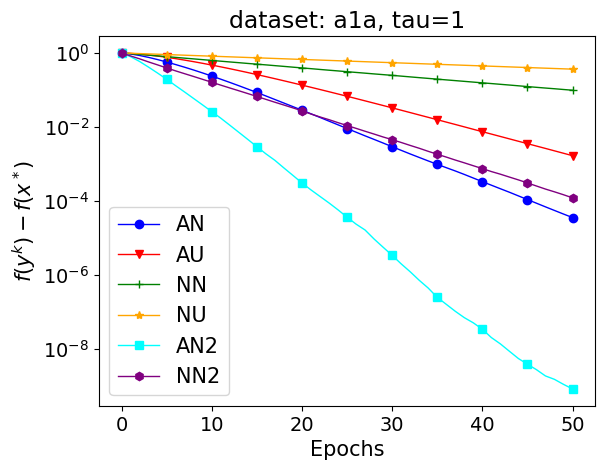

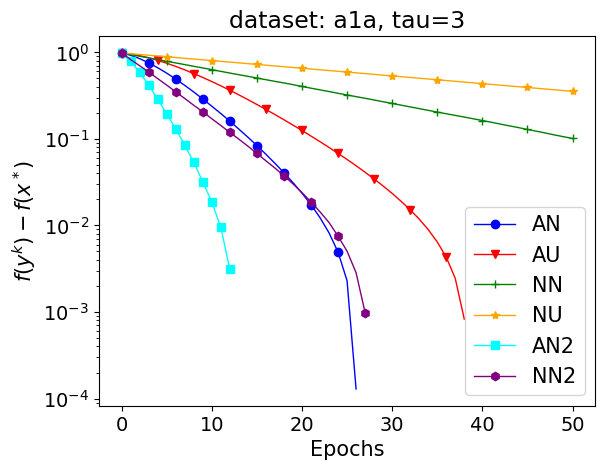

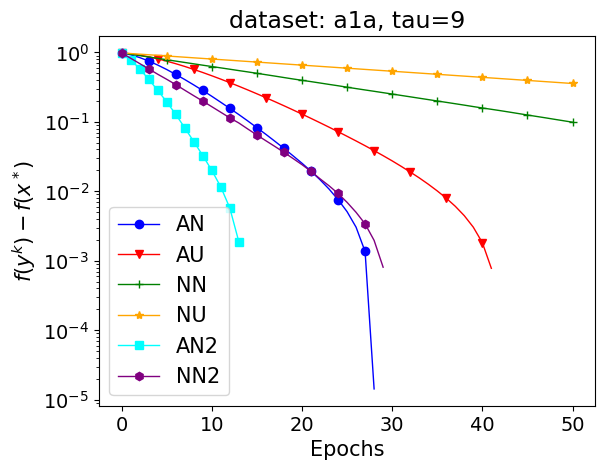

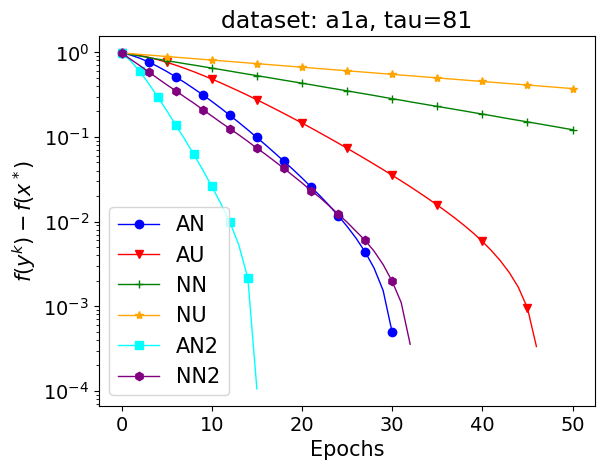

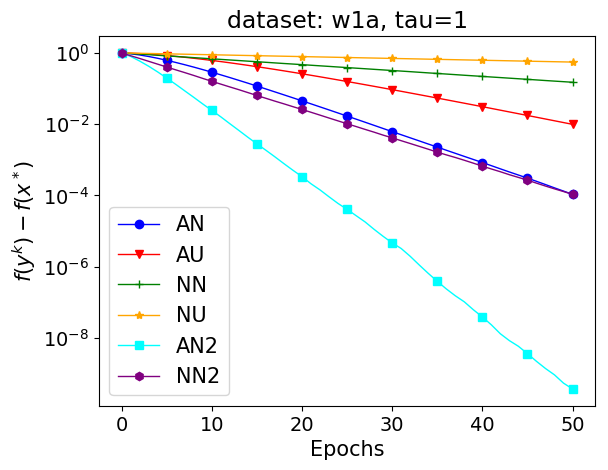

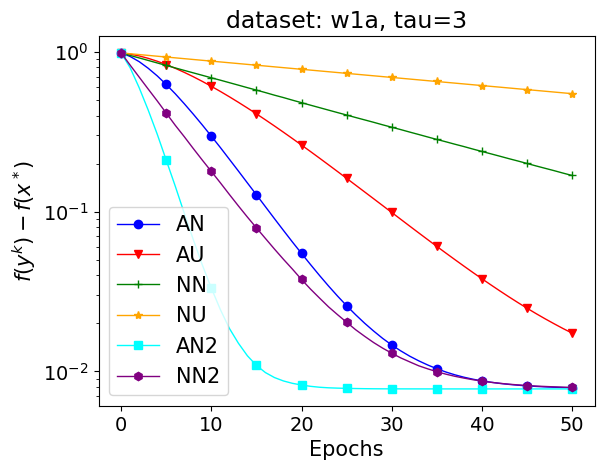

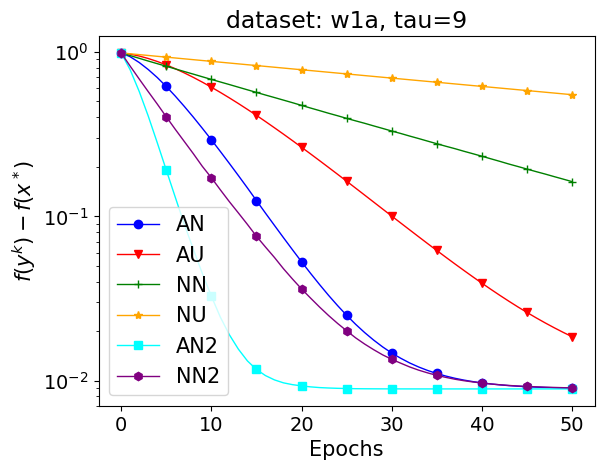

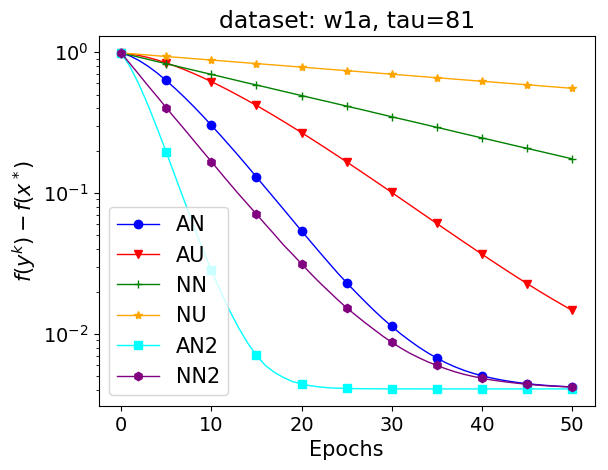

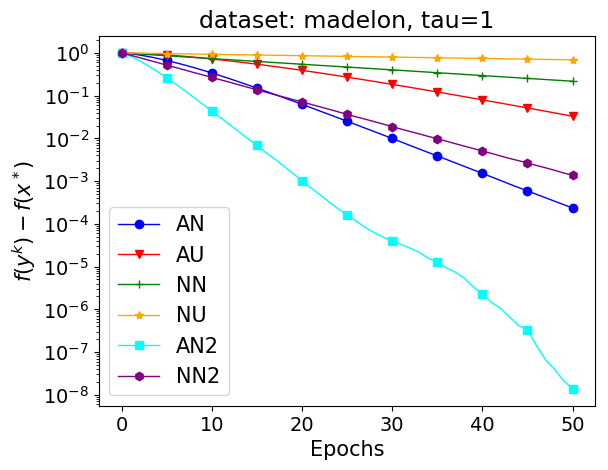

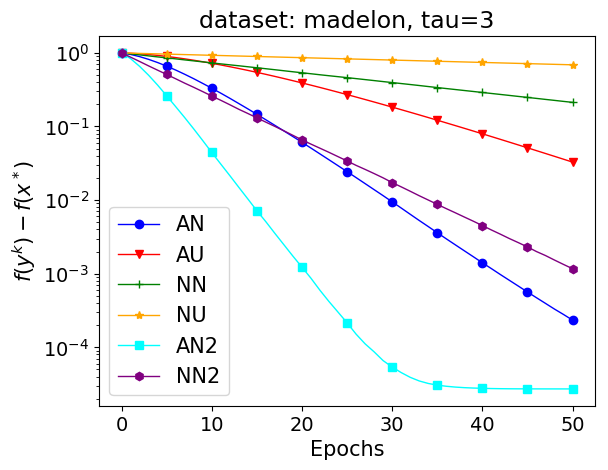

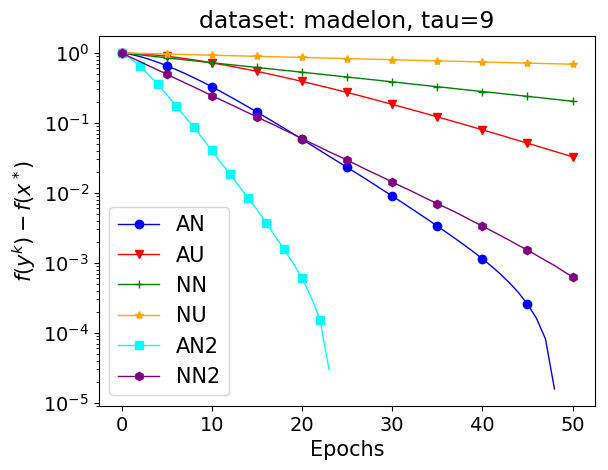

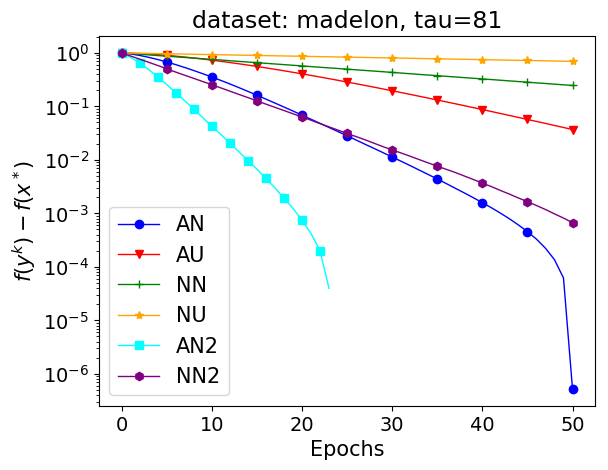

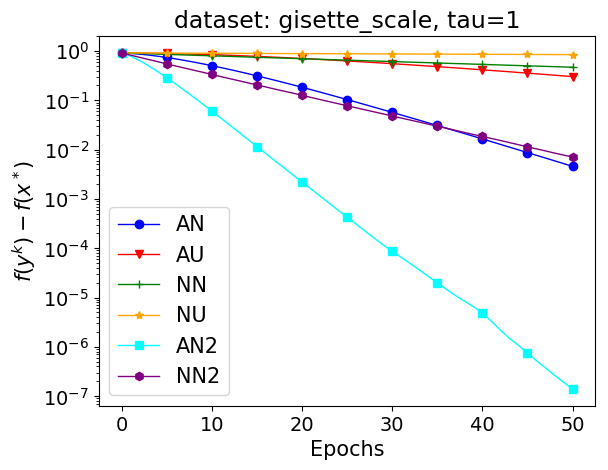

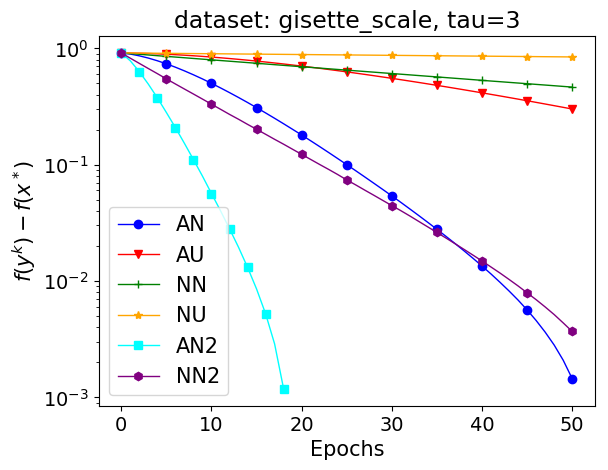

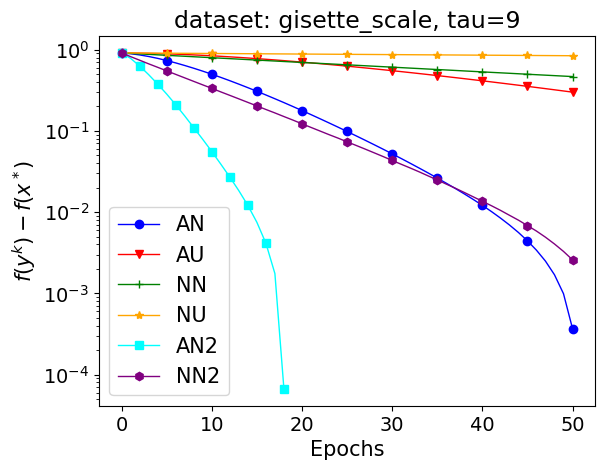

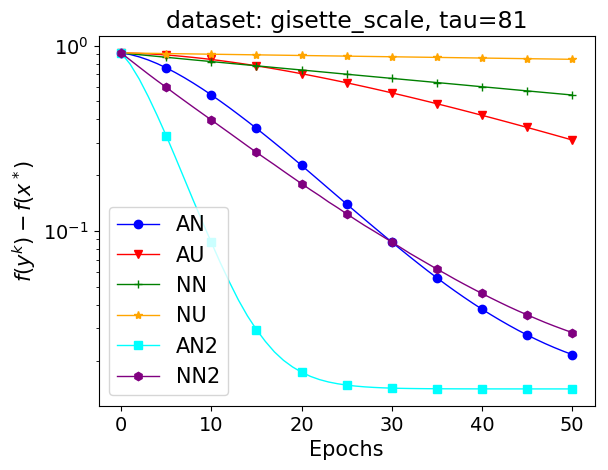

,NEW!
_____________   SAVING   ________________


In [10]:

epochs=50
skip_epoch=1

corrupt=true
datasets=["a1a","w1a", "madelon", "gisette_scale"]

taus=[1,3,9,81]


for dataset in datasets

    f_star=0
    for tau in taus
        println("###################################################################")
        println("############# DATASET: ",dataset, ", tau:",tau,"##################")
        println("###################################################################")
        f_star=libSVM_dSVM_plot(dataset,tau,epochs,skip_epoch,f_star,corrupt)
    end
end



In [ ]:
srand(1)
n=50
m=30
A=randn(n,m)
b=randn(m)
lambda=0.0000001
tau=1
nonunif=true
acc=true
T=200
skip_it=1


In [ ]:
println(NSync_SVM(A,lambda, tau, true, true, T, skip_it)[end])
println(NSync_SVM(A,lambda, tau, false, true, T, skip_it)[end])
println(NSync_SVM(A,lambda, tau, true, false, T, skip_it)[end])
println(NSync_SVM(A,lambda, tau, false, false, T, skip_it)[end])

# LIBSVM logistic regression

In [ ]:
function ComputeESO(B, alpha, gamma, tau)
    n, d = size(B)
    bl=Int64(floor(n/tau))+1
    tilde_B = B ./ sqrt.(alpha)
    tilde_B2 = tilde_B' .^ 2
    bucks=((1:tau)*bl)-bl+1
    buck(j) = ((Int64(floor((j-1)/bl))*bl+1):min((Int64(floor((j-1)/bl))*bl+bl),n))
    

    JJ(j)=(1:n)[tilde_B2[j, :].!==0]

    omega=zeros(d)
    for j=1:d
        for bb in bucks
            add1=0
            for ii=bb:(bb+bl)
                if ii in JJ(j)
                    add1=1
                end
            end
            omega[j]+=add1
        end
    end

    J=[length(JJ(j)) for j=1:d]
    v=[2*gamma+ sum((1+(1-1./omega).*J*tau/n).*tilde_B2[:,i]) for i=1:n]
end

function getPbucket(v,tau)
    n=length(v)
    p=zeros(n)
    bl=Int64(floor(n/tau))+1
    bucks=((1:tau)*bl)-bl+1
    for buck in bucks
        p[buck:min(buck+bl-1,n)]=v[buck:min(buck+bl-1,n)]/sum(v[buck:min(buck+bl-1,n)])
    end
    return p
end

function bucket_sam(p,tau)
    n=length(p)
    bl=Int64(floor(n/tau))+1
    bucks=((1:tau)*bl)-bl+1
    S=[]
    for buck in bucks
        I=sample(buck:min(buck+bl-1,n),Weights(p[buck:min(buck+bl-1,n)]))
        S=[S;I]
    end
    return(S)
end

In [8]:
function make_fg(A,b)
    m,n=size(A)
    f_log(t)=sum(log.(1+exp.(t.*b)))/m
    g_log(t,i)=A[:,i]⋅(b./(1+exp.(-t.*b)))/m
    return f_log,g_log
end



function NSync_ERM(A,b,lambda, tau, nonunif, acc, T, skip_it, newsampling=false)
    bucket=false
    eps=10.0^(-10)
    m,n = size(A)
    f_log,g_log=make_fg(A,b)
    M=A'*A/4/m+lambda*eye(n)
    
    Dm=[A[:,i]⋅A[:,i]/4/m+lambda for i=1:n]
    
    F=zeros(1+div(T,skip_it))
    
    x = zeros(n,1)    # staring point
    if newsampling
        p,v=getPv2(M,tau,acc)
    else
        p,v=getPv(M,tau,acc,nonunif)
    end
#   v=v*1000
#    p,v=getPv_cheap(Dm,tau,acc,nonunif)
#    if bucket 
#        v=ComputeESO(A', 1/4, lambda, tau)
#        p=getPbucket(v,tau)
#    end
    y=copy(x)
    z=copy(x)
    sb=[]
    tau_acc=[]
    
    sigma=eigmin(M)
    #sigma=minimum(Dm)
    
    dot_prods_x=zeros(m)
    dot_prods_y=zeros(m)
    dot_prods_z=zeros(m)
    
    F[1]=f_log(dot_prods_x) 
    if acc
        sb,tau_acc=opt_acc_params(sigma, v, p)
    else
        tau_acc=0
        sb=1
    end
    
    eta=1/(tau_acc*(sum(sqrt.(v)))^2)
    
    for k = 1:T
        
        S=[]
        if nonunif
            for i=1:n
                if rand()<p[i]
                    S=[S;i]
                end 
            end
        else
            if bucket
                S=bucket_sam(p,tau)
            else
                S=samplingK(tau, n) 
            end
        end
        
        x=(1-tau_acc)*y+tau_acc*z

        dot_prods_x=(1-tau_acc)*dot_prods_y+tau_acc*dot_prods_z

        y=copy(x)
        dot_prods_y=copy(dot_prods_x)
        if tau_acc>0
            z=(z+(sb/tau_acc)*x)/(1+sb/tau_acc)
            dot_prods_z=(dot_prods_z+(sb/tau_acc)*dot_prods_x)/(1+sb/tau_acc)
        end

        for i in S                               
            gradi = g_log(dot_prods_y,i)+lambda*y[i]

            y[i] = x[i] - (1/v[i])*gradi 
            dot_prods_y= dot_prods_y-A[:,i]*(1/v[i])*gradi

            if tau_acc>0
                z[i] = z[i]- (p[i]/(v[i]*tau_acc)*gradi)/(1+sb/tau_acc) #update on z
                dot_prods_z-=(p[i]/(v[i]*tau_acc)*gradi)/(1+sb/tau_acc)*A[:,i]

            end
        end
  
        
        
        if k%skip_it==0
            F[Int64(k/skip_it)+1]=f_log(dot_prods_y)+lambda*norm(y)^2/2
            # get a reasonable stopping criterion
        end

    end    

    return F
    
end



NSync_ERM (generic function with 2 methods)

In [ ]:

epochs=100
skip_epoch=1

bucket=false
corrupt=true
datasets=["a1a"]#,"w1a","madelon","gisette_scale","w8a"]

taus=[1,3,9,81]

for corrupt=[true,false]
    for dataset in datasets

        f_star=0
        for tau in taus
            println("###################################################################")
            println("############# DATASET: ",dataset, ", tau:",tau,"##################")
            println("###################################################################")
            f_star=libSVM_logreg_plot(dataset,tau,epochs,skip_epoch,f_star,bucket,corrupt)
        end
    end
end

###################################################################
############# DATASET: a1a, tau:1##################
###################################################################
./data/a1a.jld
11900
119
_____________________________
, acc: true, nonunif: true
, acc: true, nonunif: false
, acc: false, nonunif: true
, acc: false, nonunif: false
NEW!
NEW!
_____________   SAVING   ________________
###################################################################
############# DATASET: a1a, tau:3##################
###################################################################
./data/a1a.jld
3900
39
_____________________________
, acc: true, nonunif: true
, acc: true, nonunif: false
, acc: false, nonunif: true
, acc: 

In [ ]:
  epochs=100
skip_epoch=1

bucket=false
corrupt=true
tau=1
transformDataJLD("a1a")
    A,b = loadDataset("a1a")
    A=A'

    m,n=size(A)
    T=Int64(floor(n/tau))*epochs
    skip_it=Int64(floor(n/tau*skip_epoch))
    println(T)
    println(skip_it)
    DmA=[A[:,i]⋅A[:,i]/4/m for i=1:n]
    lambda=maximum(DmA)/(4*m^2)
    #lambda=eigmax(full(A'*A))/(4*m^2)
 #   M=A'*A/4/m+lambda*eye(n)

 #   if f_star==0
    NSync_ERM(A,b,lambda, tau, true, true, T, skip_it)

# Quadratic artificial

In [ ]:
function NSync(sdna, M, b, tau, nonunif, acc, T, skip_it,import2=false)
    eps=10.0^(-10)
    
    n = size(M)[1]
    
    x_star = M\b
    
    f(x)=(1/2*x'*M*x-b'*x)[1]
    

    
    #X=zeros(n,1+div(T,skip_it))
    F=zeros(1+div(T,skip_it))
    F[1]=f(zeros(n))-f(x_star) 
    x = zeros(n,1)    # staring point
    p,v=getPv(M,tau,acc,nonunif)
    
    if import2
        p,v=getPv2(M,tau,acc)
    end
    
    y=copy(x)
    z=copy(x)
    sb=[]
    tau_acc=[]
    sigma=eigmin(M)
   # println(v)
    G_invP=[]
    if sdna 
        G_invP=estim_emi(M,p,tau*n*10)
        ccc=getLB(G_invP)
        G_invP=G_invP/(1+(n/tau-1)/ccc)
        #display(G_invP)
    end
    
    if acc
        if sdna
            sb,tau_acc=opt_acc_params_sdna(G_invP,M)
        else
            sb,tau_acc=opt_acc_params(sigma, v, p)
        end    
    else
        tau_acc=0
        sb=1
    end
    if sdna
        G_invP=G_invP*diagm(1./p)
    end
   
    eta=1/(tau_acc*(sum(sqrt.(v)))^2)
    
    for k = 1:T
        S=[]
        if nonunif
            for i=1:n
                if rand()<p[i]
                    S=[S;i]
                end
            end
        else
            S=samplingK(tau, n) 
        end
        
        if acc
            x=(1-tau_acc)*y+tau_acc*z
            gradi=(M[S,:]*x-b[S])
            y=copy(x)
            z=(z+(sb/tau_acc)*x)/(1+sb/tau_acc)
            if sdna
                y[S] = x[S] - M[S,S]\gradi
            else
                y[S] = x[S] - (1./v[S]).*gradi
            end
            if sdna
                z = z- (G_invP[:,S]*gradi)/(tau_acc+sb)                 
            else
                z[S] = z[S]- (p[S]./(v[S]).*gradi)/(tau_acc+sb) #update on z     
            end
        else
            gradi=(M[S,:]*y-b[S])
            if sdna
                y[S] = y[S] - M[S,S]\gradi
            else
                y[S] = y[S] - (1./v[S]).*gradi
            end                
        end

        
        
        
        if k%skip_it==0
            #println(k)
            F[Int64(k/skip_it)+1]=f(y)-f(x_star)
            #X[:,Int64(k/skip_it)+1]=y
            if f(y)-f(x_star)<eps
               break 
            end
        end

    end

    F=F[F.>eps]

    return F
    
end



In [ ]:
n=6
b=randn(n)
M=randn(n,n)
M=M'*M+eye(n)
M,b=getM(2,100)
tau=5
T=10000
skip_it=1
nonunif=false

acc=true
sdna=true
F1=NSync(sdna, M, b, tau, nonunif, acc, T, skip_it)

acc=false
sdna=true
F2=NSync(sdna, M, b, tau, nonunif, acc, T, skip_it)


acc=true
sdna=false
F3=NSync(sdna, M, b, tau, nonunif, acc, T, skip_it)

semilogy(F1,color="blue")
semilogy(F2,color="red")
semilogy(F3,color="green")

In [ ]:

using PyPlot

skip_it=50
T = 20000
sdna=false
theory=true

for n= [1000]
    for tau=[1,3,9,81]
        println("###############################")
        println("n= ",n,", tau=",tau)
        println("###############################")
        for typ=1:5
            plot_1(typ,n,tau,T,skip_it,sdna,theory)
        end
        close()
    end
end

In [ ]:
M,b=getM(7,20)
eigmin(M)


In [ ]:

using PyPlot

skip_it=10
T = 10000
sdna=false
theory=true

n=21
 for tau=[1,3,9]
for typ=7:7
        println("###############################")
        println("TYP: ",typ)
        println("###############################")    
   
        println("n= ",n,", tau=",tau)
        
            sdna_cmp(typ,n,tau,T,skip_it)
    end
        #close()
end


In [ ]:
M,b=Dual_rr_LIBSVM("a1a")


In [ ]:
getLB(M)

In [ ]:
typs=["a1a","w1a","madelon","splice_scale","gisette_scale","w8a","protein"]
skip_it=10
T = 10000
sdna=false
theory=true
n=1

for typ in typs
        println("###############################")
        println("TYP: ",typ)
        println("###############################")  
        for tau=[1,3,9,27,81]


            println("n= ",n,", tau=",tau)

                
            sdna_cmp(typ,n,tau,T,skip_it,false)

        end
        #close()
end

In [ ]:
 typs=["splice_scale","madelon","gisette_scale"] #"a1a","w1a","w8a",,,"leu","protein"
skip_it=10
T = 10000
sdna=false
theory=true
n=1

for typ in typs
        println("###############################")
        println("TYP: ",typ)
        println("###############################")  
        for tau=[1,3,9,27]


            println("n= ",n,", tau=",tau)

                
            sdna_cmp(typ,n,tau,T,skip_it,true)

        end
        #close()
end

In [ ]:
#plot type 2
using PyPlot

skip_it=50
T = 20000

taus=[1,3,9,27,81]

for typ=1:6
    for n=1000:1000
        for acc= [true, false]
            for nonunif=[true,false]
                println("###############################")
                println("n= ",n,", acc= ",acc,", nonunif= ",nonunif)
                println("###############################")
                plot_2(typ,n,taus,nonunif,acc,T,skip_it)  
               # close()
            end
        end
    end
end

In [ ]:
theory=true
sdna=true
skip_epoch=1
epochs=100

datasets=["a1a","w1a","w8a","gisette_scale", "madelon","splice_scale","leu","protein"]

for dataset in datasets
    for dual=[false,true]
        for tau=[1,3,9,27]
            f_star=libSVM_ridge(dataset,dual,tau,epochs,skip_epoch,sdna,theory)
        end
    end
end

## libSVM

In [ ]:
include("dataLoad.jl")
initDetails()

datasets = ["liver-disorders"]  
for  dataset in datasets
    transformDataJLD(dataset)
    X,y = loadDataset(dataset)
    showDetails(dataset)
    display(y)
    display(X)
end


In [ ]:
function Loss_logistic(X::SparseMatrixCSC, y::Array{Float64,1}, γ::Float64, λ::Float64)
    n = size(X)[2]
    f(w, i) = 4*log(1+exp(y[i]*X[:,i]⋅w))
    g(w, i) = 4*y[i]/(γ*(1+exp(-y[i]*X[:,i]⋅w)))
    P(w)    = 1/n*sum([f(w,i) for i=1:n]) + λ/2*w⋅w
    return(g, P)
end

In [ ]:
using StatsBase

function NUACDM(M,  T)
    
    m, n = size(M)
    
    x_star = zeros(n)
        x = randn(n)
    #f(x)=norm(A*x-b)^2+lambda*norm(x)^2
    f(x)=(x'*M*x)/2
    
    X=zeros(n,T+1)
    F=zeros(T+1)
    


    p,v=getPv_NUACDM(M)
    
    y=copy(x)
    z=copy(x)
    sigma=eigmin(M)
    Sa=sum(sqrt.(v))
    tau_acc= 2/(1+sqrt(1+4*Sa^2/sigma))
    eta=1/(tau_acc*Sa^2)
    
    F[1]=f(x)-f(x_star)#+tau_acc/(2*eta*(1-tau_acc))*norm(z)^2
    
    for k = 1:T

        i = sample(1:n, Weights(p))

        gradi = (M*x)[i] # ( A[:,i]' * g + lambda * x[i] )  # compute the gradient 
        y=copy(x)
        y[i] = x[i] - (1/v[i])*gradi                            # perform the update on y
        
        z=(z+(sigma*eta)*x)/(1+sigma*eta)
        z[i] = z[i] -(eta/(p[i])*gradi)/(1+sigma*eta) #update on z

        x=tau_acc*z+(1-tau_acc)*(y)#(x[i] - (1/v[i])*gradi)

   
        F[k+1]=f(y)-f(x_star)+tau_acc/(2*eta*(1-tau_acc))*norm(z)^2
        X[:,k+1]=y

    end
    
    return X,F
    
end


In [ ]:
using PyPlot
srand(1)
m = 100
n = 200
A = randn(m,n) 
lambda = 1

T = 10000


M=ones(5,5)
M=M+eye(5)/10
M[1,1]=3


M=A'*A+eye(n)

acc=true
X,F= NUACDM(M, T)
semilogy(F,color="blue")
p,v=getPv_NUACDM(M)
println("ESO (should be 0):   ",norm(p.*v-diag(M).*p))
sigma=eigmin(M)
rate=rateNUACDM(v,sigma)
rate_app=rate_approx_NUACDM(M)
println(1/(1-rate))
println(1/(1-rate_app))
Ft=f_theory(F[1],rate,T,1)
semilogy(Ft,"--",color="blue")

In [ ]:
using PyPlot

function PlotResults(x_values, y_values, labels)
    ax = axes()
    numOfPlots = length(labels)
    for i = 1:numOfPlots
        plt[:plot](x_values, y_values[:,i], "-", linewidth=3.0, label=labels[i])
    end
    legend(loc="upper right")
    ylabel("error", fontsize=20)
    xlabel("iterations")
    ax[:set_yscale]("log")
    plt[:show]
    
end